# Initial clustering approach

This notebook demonstrates how clustering of feature vectors can be used to help improve posterior inference in basket trials.

In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import sys
from os.path import exists

sys.path.append('..')
sys.path.append('.')

In [3]:
import numpy as np
import pandas as pd
import arviz as az

In [4]:
from pyBasket.env import Trial, TrueResponseSiteWithFeatures
from pyBasket.common import DEFAULT_EFFICACY_CUTOFF, DEFAULT_FUTILITY_CUTOFF
from pyBasket.common import MODEL_SIMPLE, MODEL_BHM, MODEL_LOGRES

In [5]:
DEBUG = True

In [6]:
num_burn_in = 5E3
num_posterior_samples = 5E3
num_chains = None # let pymc decide

In [7]:
if DEBUG:
    num_burn_in = 1E3
    num_posterior_samples = 1E3
    num_chains = 1

## Generate data

Similar set-up to CBHM paper.

In [8]:
K = 6    # the number of groups
p0 = 0.20 # null response rate
p1 = 0.40 # target response rate

true_response_rates = [p0, p0, p1, p1, p1, p1]
enrollment = [10, 10]

n = 100
dim = 8
pvals_map = {
    p0: [1/10] * dim,
    p1: ([0.05] * int(dim/2)) + ([0.15] * int(dim/2))
}

sites = []
for k in range(K):
    true_response_rate = true_response_rates[k]
    pvals = pvals_map[true_response_rate]
    site = TrueResponseSiteWithFeatures(k, true_response_rate, enrollment, n, pvals)
    sites.append(site)

evaluate_interim = [True, True]
analysis_names = [MODEL_BHM, MODEL_LOGRES]

In [9]:
futility_cutoff = DEFAULT_FUTILITY_CUTOFF
efficacy_cutoff = DEFAULT_EFFICACY_CUTOFF
early_futility_stop = True
early_efficacy_stop = False

In [10]:
plot_PCA = True
n_components = 5
plot_distance = True
plot_dendrogram = True
max_d = 70

In [11]:
trial = Trial(
    K, p0, p1, sites, evaluate_interim, num_burn_in, num_posterior_samples, analysis_names, 
    futility_cutoff=futility_cutoff, efficacy_cutoff=efficacy_cutoff, 
    early_futility_stop=early_futility_stop, early_efficacy_stop=early_efficacy_stop, num_chains=num_chains,
    plot_PCA=plot_PCA, n_components=n_components, plot_distance=plot_distance, plot_dendrogram=plot_dendrogram, max_d=max_d)

## Infer responses per basket


########## Stage=0 ##########

Registering Group 0 (OPEN): 4/10 for Analysis bhm
Registering Group 0 (OPEN): 4/10 for Analysis logres
Registering Group 1 (OPEN): 2/10 for Analysis bhm
Registering Group 1 (OPEN): 2/10 for Analysis logres
Registering Group 2 (OPEN): 4/10 for Analysis bhm
Registering Group 2 (OPEN): 4/10 for Analysis logres
Registering Group 3 (OPEN): 4/10 for Analysis bhm
Registering Group 3 (OPEN): 4/10 for Analysis logres
Registering Group 4 (OPEN): 4/10 for Analysis bhm
Registering Group 4 (OPEN): 4/10 for Analysis logres
Registering Group 5 (OPEN): 4/10 for Analysis bhm
Registering Group 5 (OPEN): 4/10 for Analysis logres

Clustering for bhm
Clustering for logres


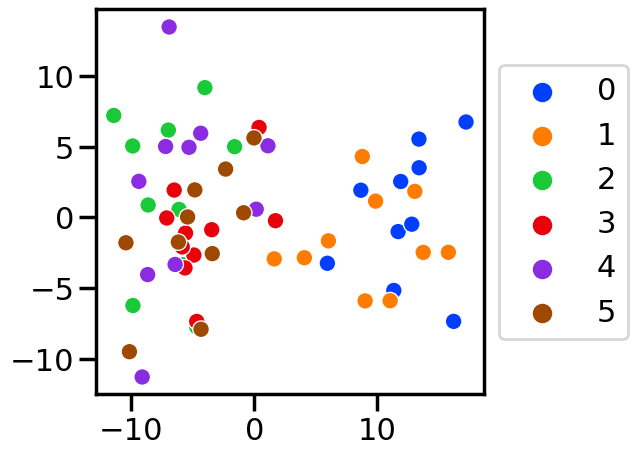

PCA explained variance [0.54086766 0.72534055 0.80263107 0.86816823 0.92261275]


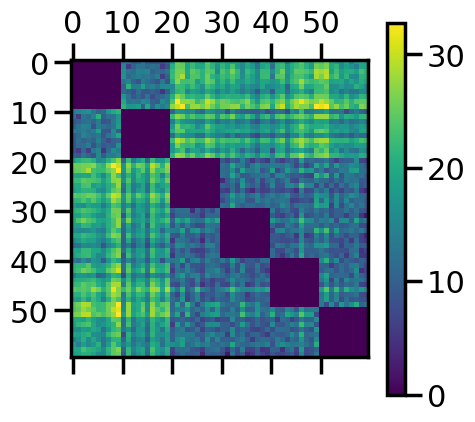

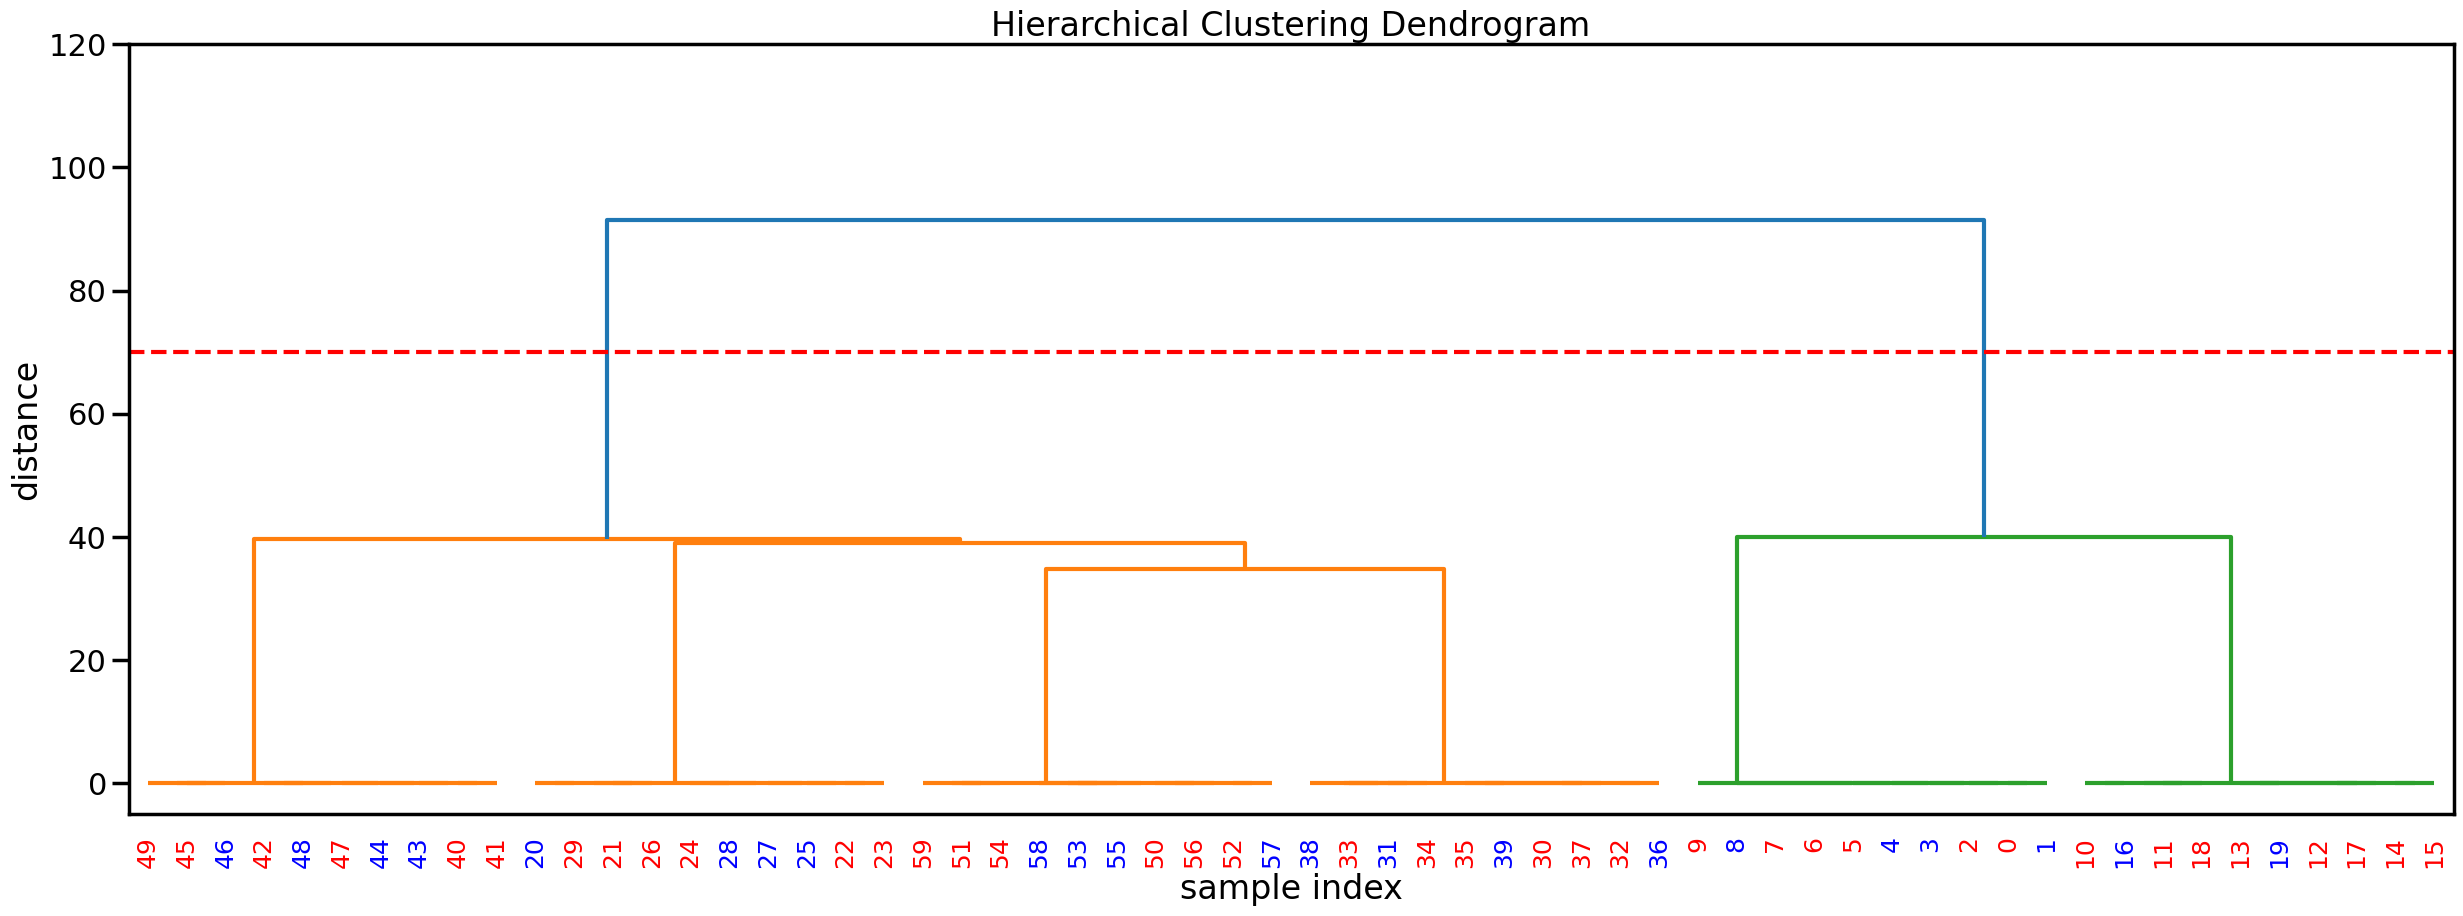


Running inference for: bhm
   n_success  n_trial
0          4       10
1          2       10
2          4       10
3          4       10
4          4       10
5          4       10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 3 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


,prob,futile,effective
k,,,
0,0.799,False,False
1,0.629,False,False
2,0.783,False,False
3,0.814,False,False
4,0.806,False,False
5,0.810,False,False


Running inference for: logres
   sk_0  sk_1  n_success  n_trial
0  0.00   0.5          4       10
1  0.00   0.5          2       10
2  0.25   0.0          4       10
3  0.25   0.0          4       10
4  0.25   0.0          4       10
5  0.25   0.0          4       10


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [z_alpha, z_beta, mu_alpha, sigma_alpha, sigma_beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 11 seconds.


,prob,futile,effective
k,,,
0,0.577,False,False
1,0.405,False,False
2,0.844,False,False
3,0.852,False,False
4,0.861,False,False
5,0.858,False,False



########## Stage=1 ##########

Registering Group 0 (OPEN): 5/20 for Analysis bhm
Registering Group 0 (OPEN): 5/20 for Analysis logres
Registering Group 1 (OPEN): 4/20 for Analysis bhm
Registering Group 1 (OPEN): 4/20 for Analysis logres
Registering Group 2 (OPEN): 11/20 for Analysis bhm
Registering Group 2 (OPEN): 11/20 for Analysis logres
Registering Group 3 (OPEN): 9/20 for Analysis bhm
Registering Group 3 (OPEN): 9/20 for Analysis logres
Registering Group 4 (OPEN): 6/20 for Analysis bhm
Registering Group 4 (OPEN): 6/20 for Analysis logres
Registering Group 5 (OPEN): 10/20 for Analysis bhm
Registering Group 5 (OPEN): 10/20 for Analysis logres

Clustering for bhm
Clustering for logres


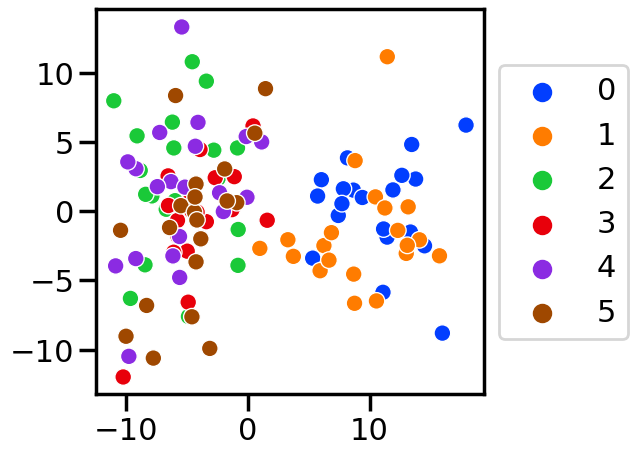

PCA explained variance [0.50036127 0.6767011  0.77101417 0.84887186 0.90798914]


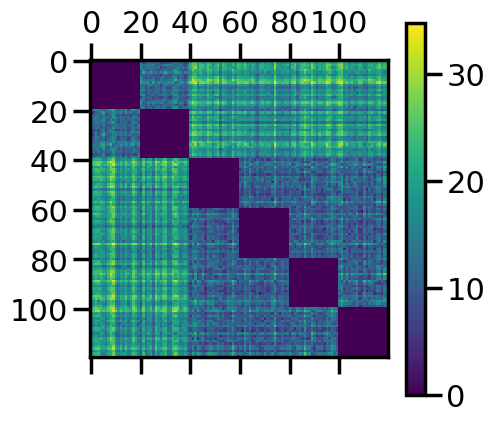

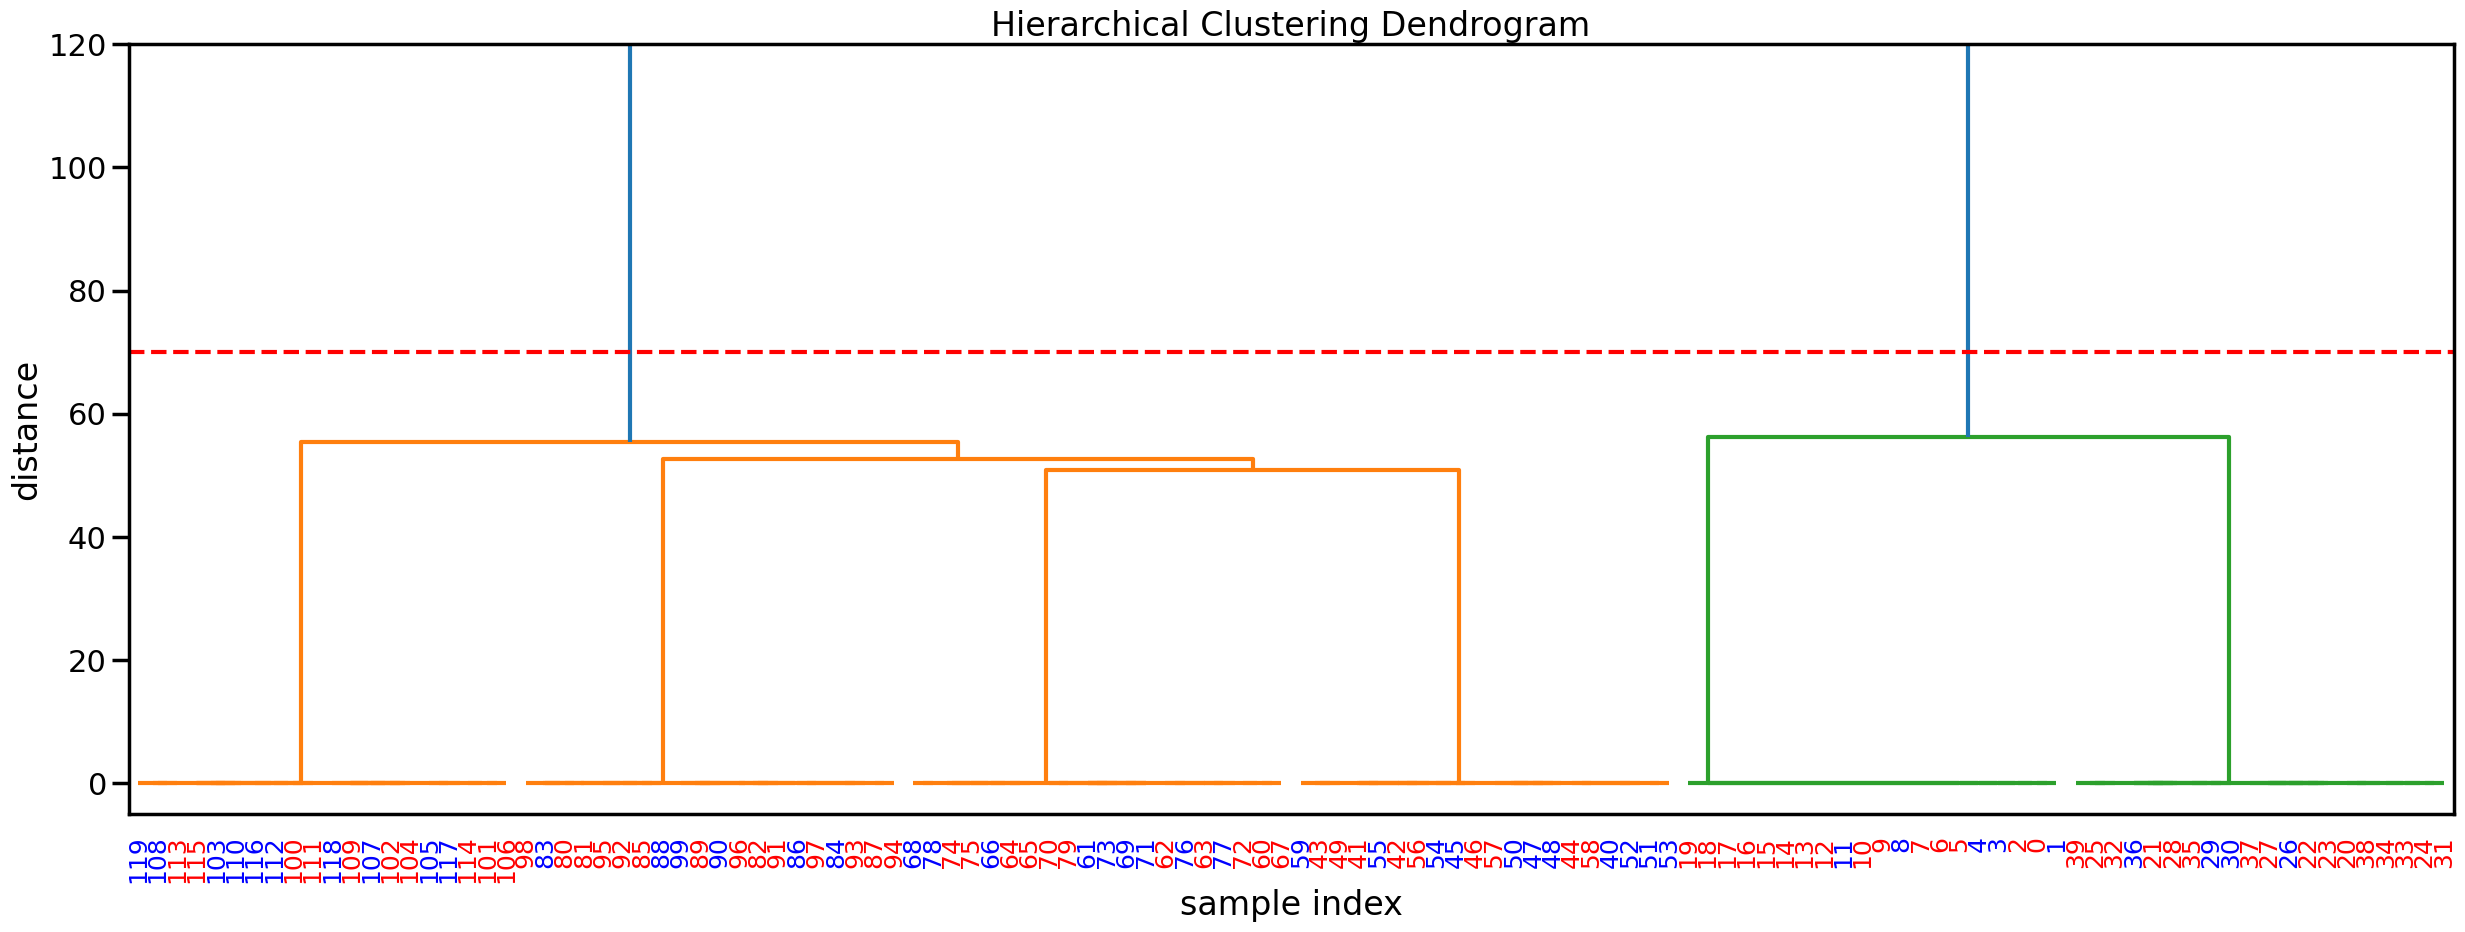


Running inference for: bhm
   n_success  n_trial
0          5       20
1          4       20
2         11       20
3          9       20
4          6       20
5         10       20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [z_alpha, mu_alpha, sigma_alpha]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 3 seconds.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8987, but should be close to 0.95. Try to increase the number of tuning steps.


,prob,futile,effective
k,,,
0,0.883,None,False
1,0.807,None,False
2,1.000,None,True
3,1.000,None,True
4,0.931,None,True
5,0.997,None,True


Running inference for: logres
   sk_0  sk_1  n_success  n_trial
0  0.00   0.5          5       20
1  0.00   0.5          4       20
2  0.25   0.0         11       20
3  0.25   0.0          9       20
4  0.25   0.0          6       20
5  0.25   0.0         10       20


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [z_alpha, z_beta, mu_alpha, sigma_alpha, sigma_beta]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 15 seconds.


,prob,futile,effective
k,,,
0,0.647,None,False
1,0.581,None,False
2,1.000,None,True
3,0.998,None,True
4,0.977,None,True
5,1.000,None,True


In [12]:
done = trial.reset()
while not done:
    done = trial.step()

## Results

### BHM

In [13]:
analysis_name = analysis_names[0]
analysis_name

'bhm'

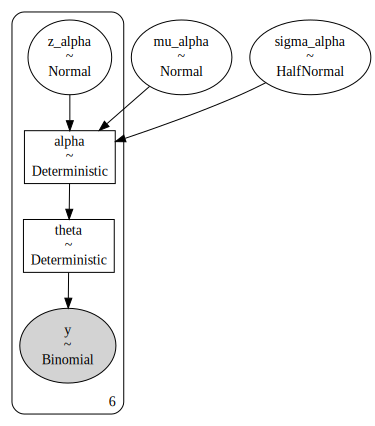

In [14]:
trial.visualise_model(analysis_name)

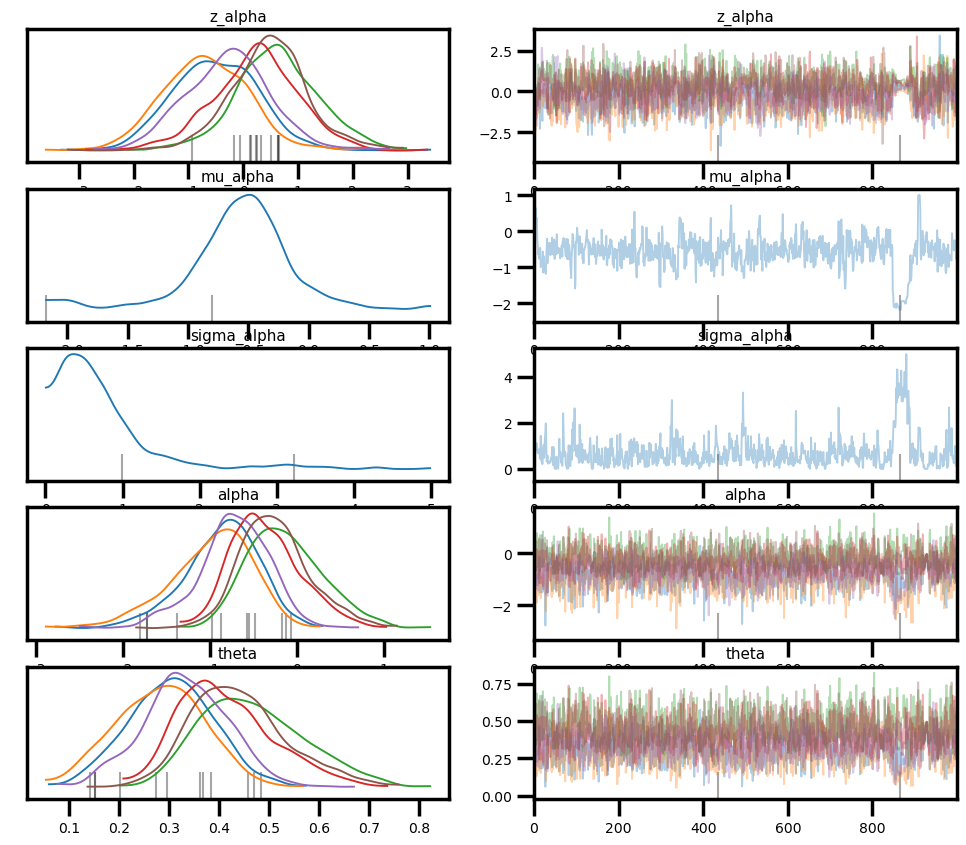

In [15]:
trial.plot_trace(analysis_name, -1)

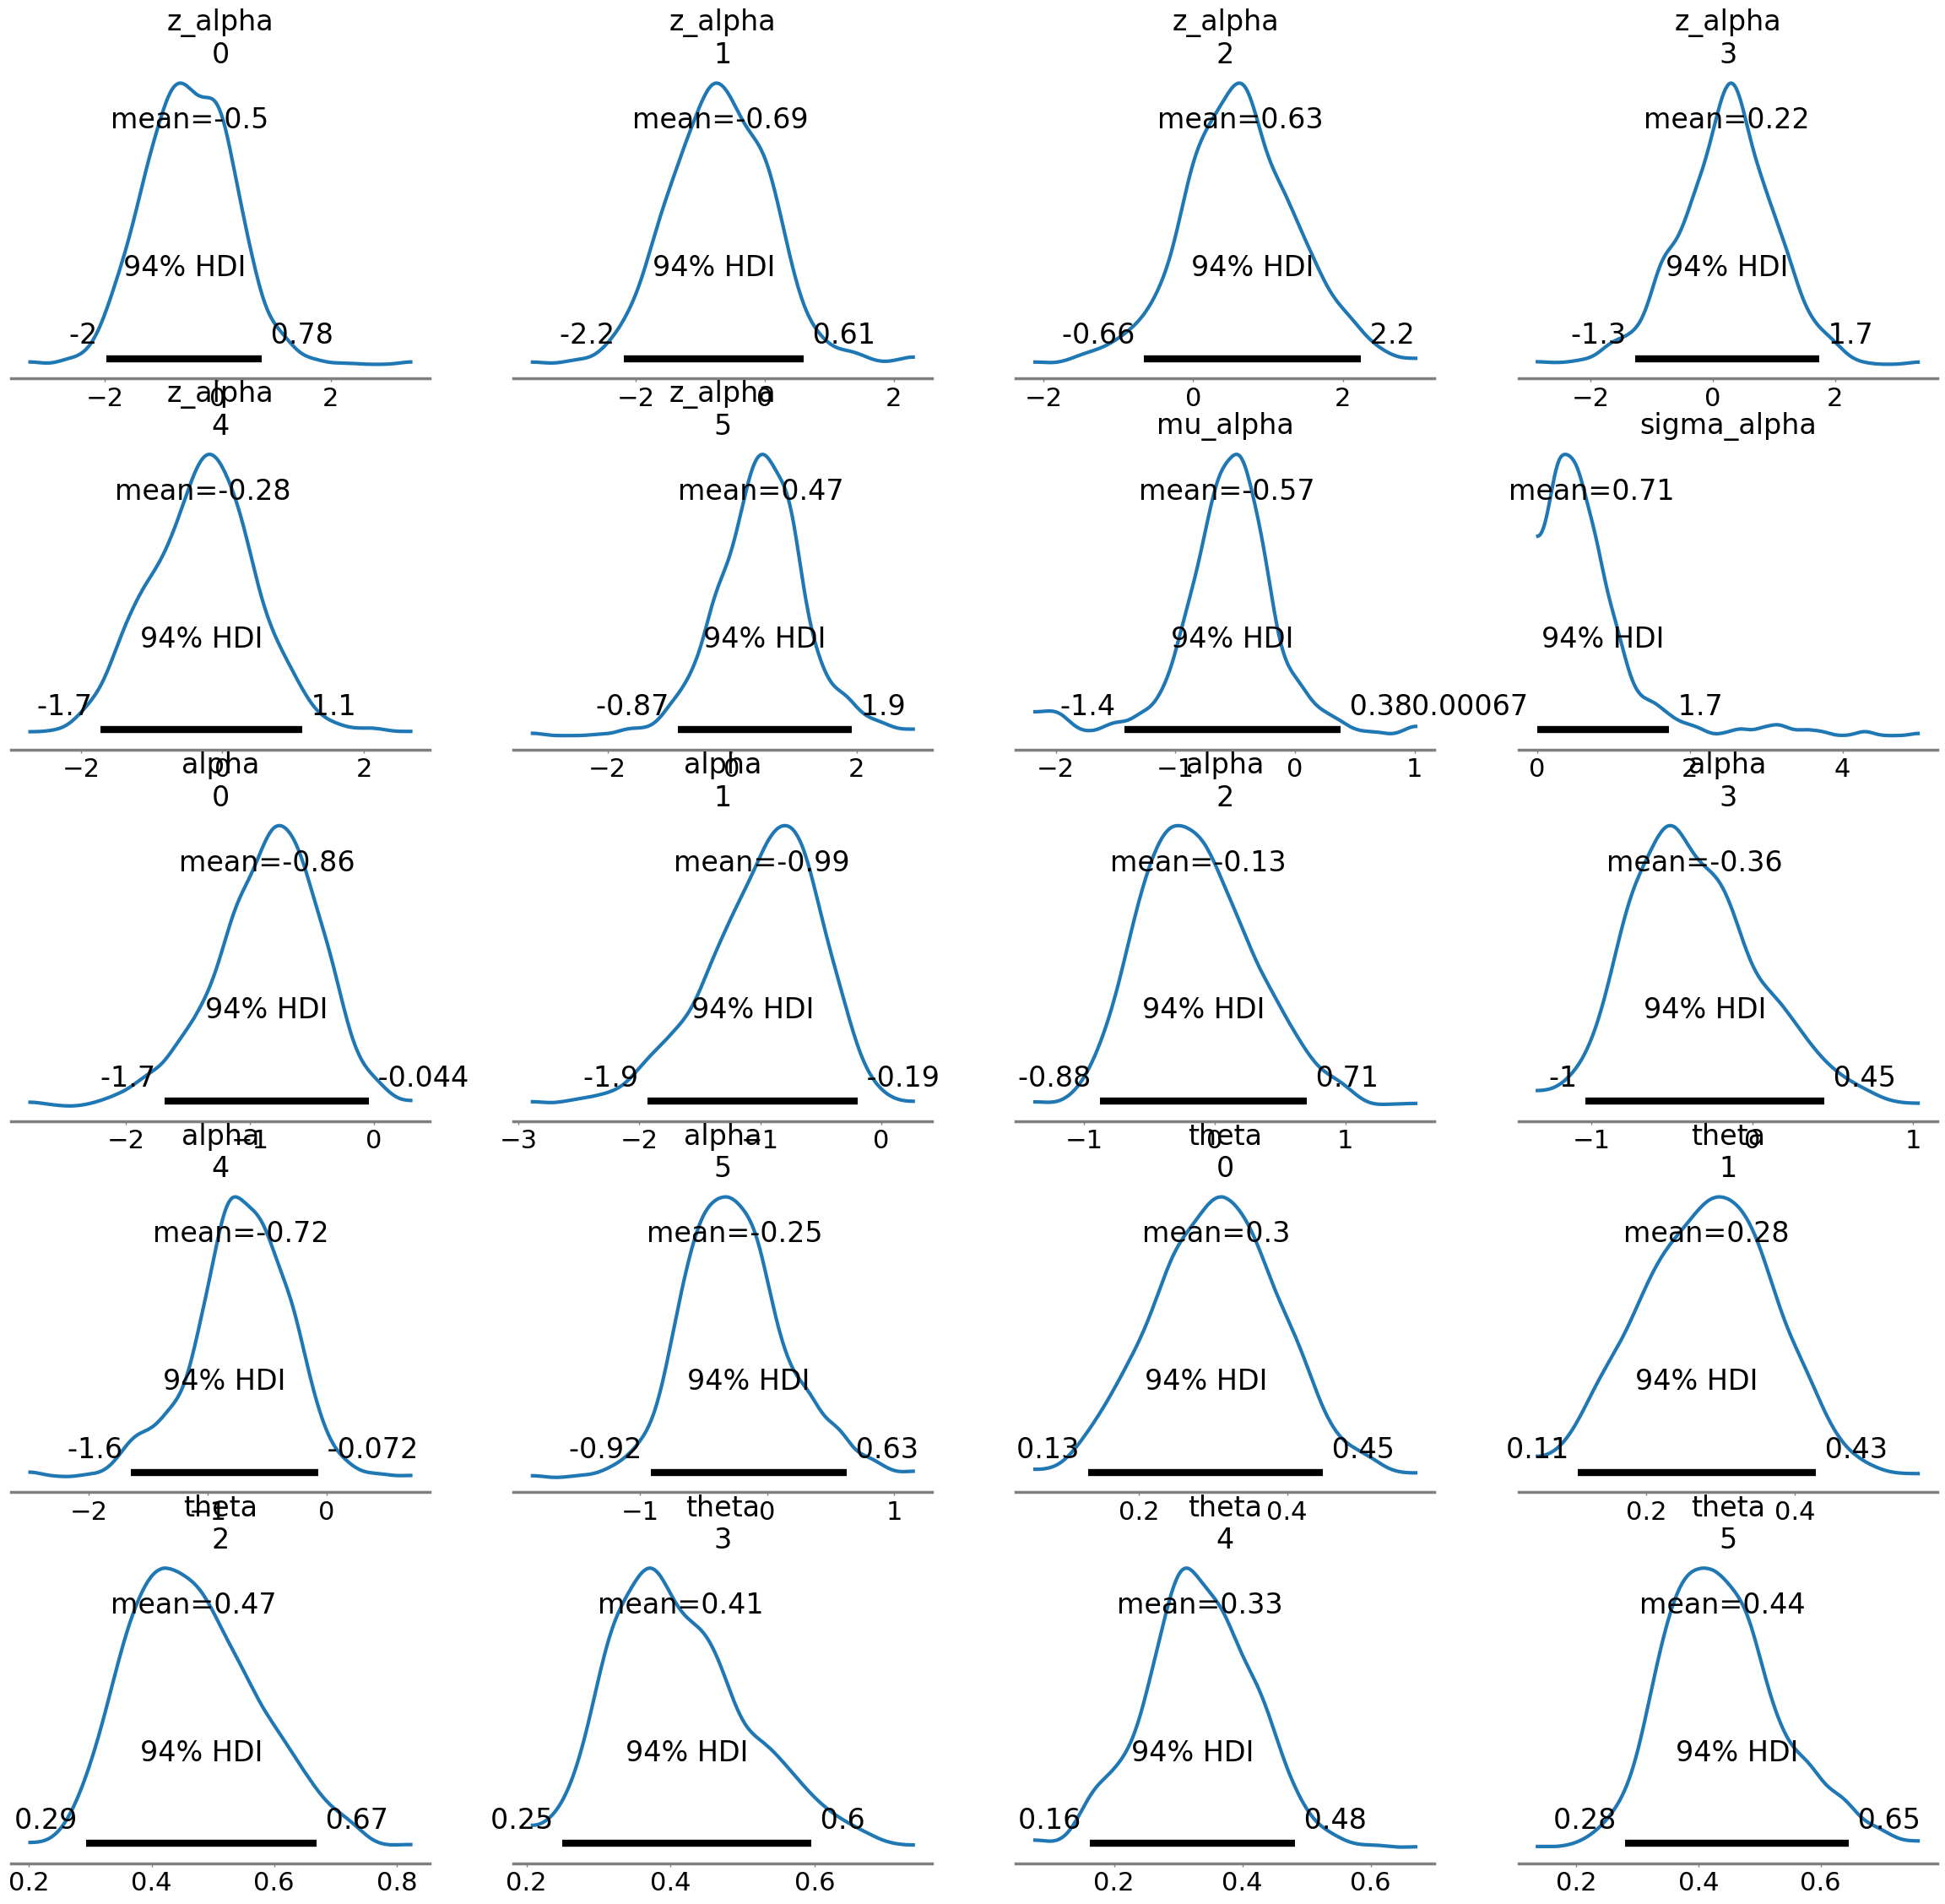

In [16]:
trial.plot_posterior(analysis_name, -1)

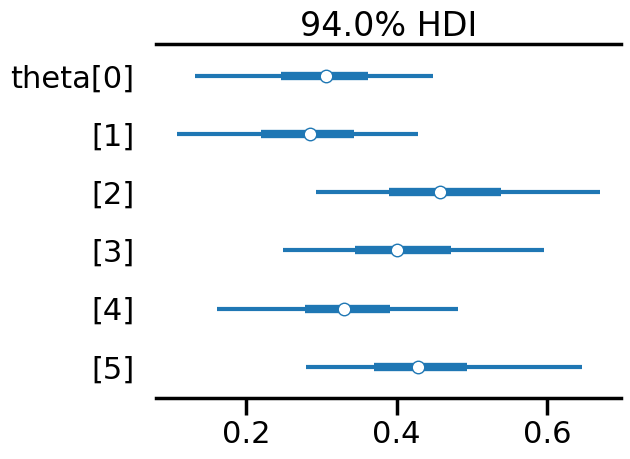

In [17]:
trial.plot_forest(analysis_name, -1)

In [18]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,5,20
1,COMPLETED_INEFFECTIVE,4,20
2,COMPLETED_EFFECTIVE,11,20
3,COMPLETED_EFFECTIVE,9,20
4,COMPLETED_EFFECTIVE,6,20
5,COMPLETED_EFFECTIVE,10,20


### LogRes

In [19]:
analysis_name = analysis_names[1]
analysis_name

'logres'

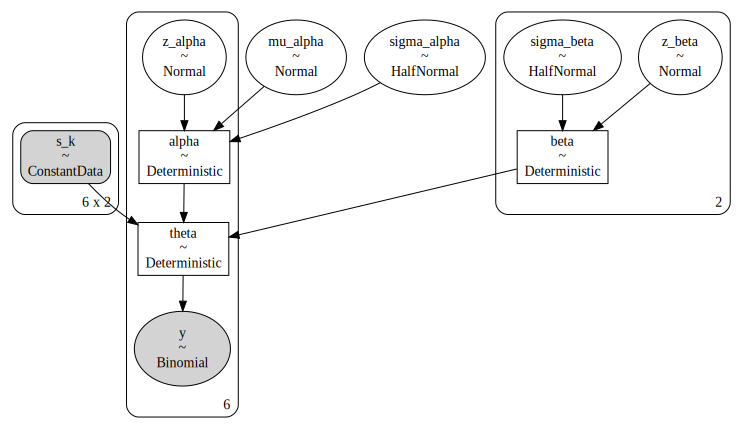

In [20]:
trial.visualise_model(analysis_name)

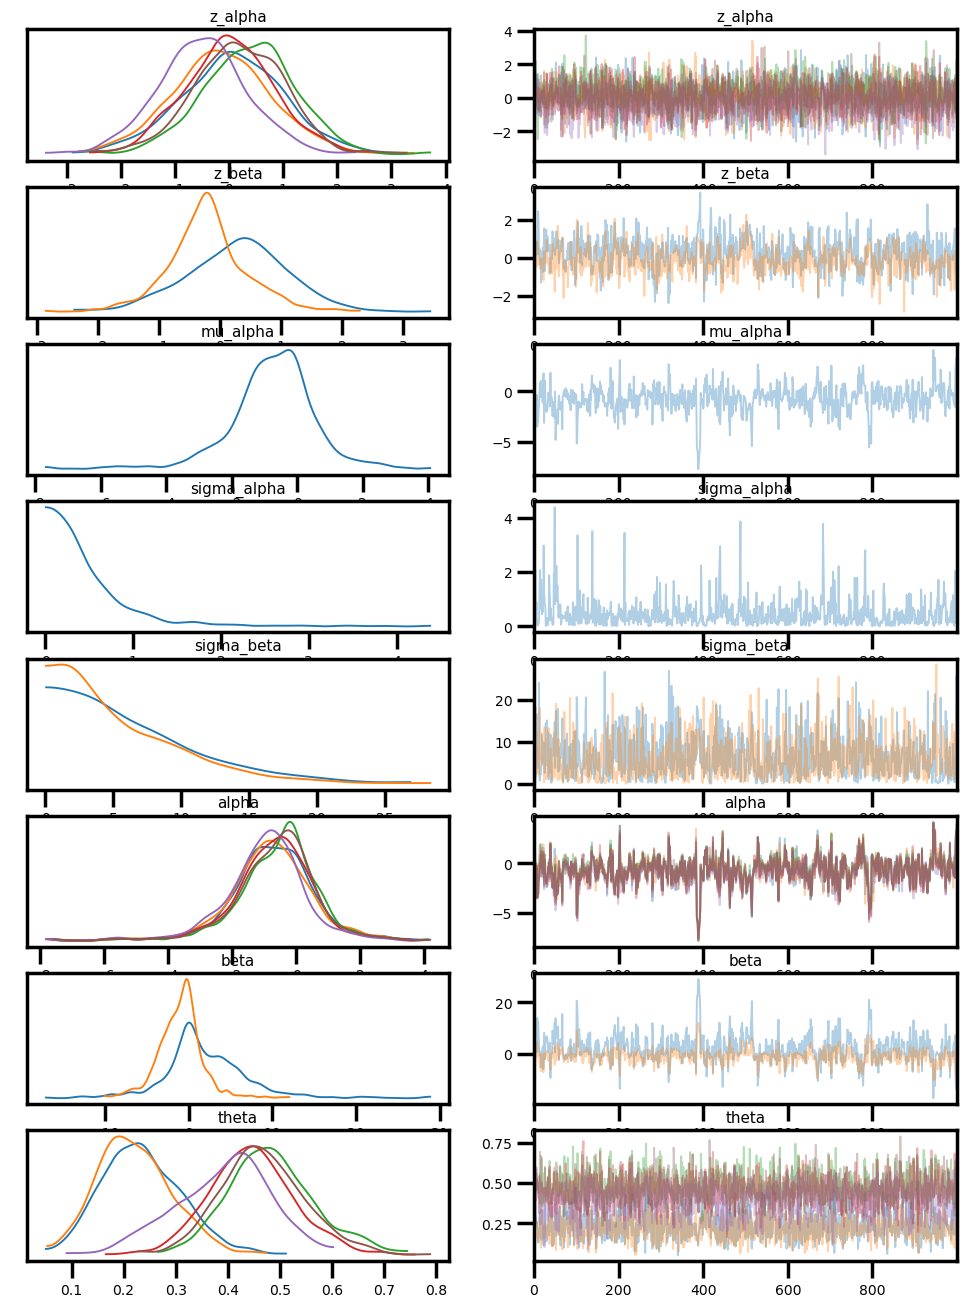

In [21]:
trial.plot_trace(analysis_name, -1)

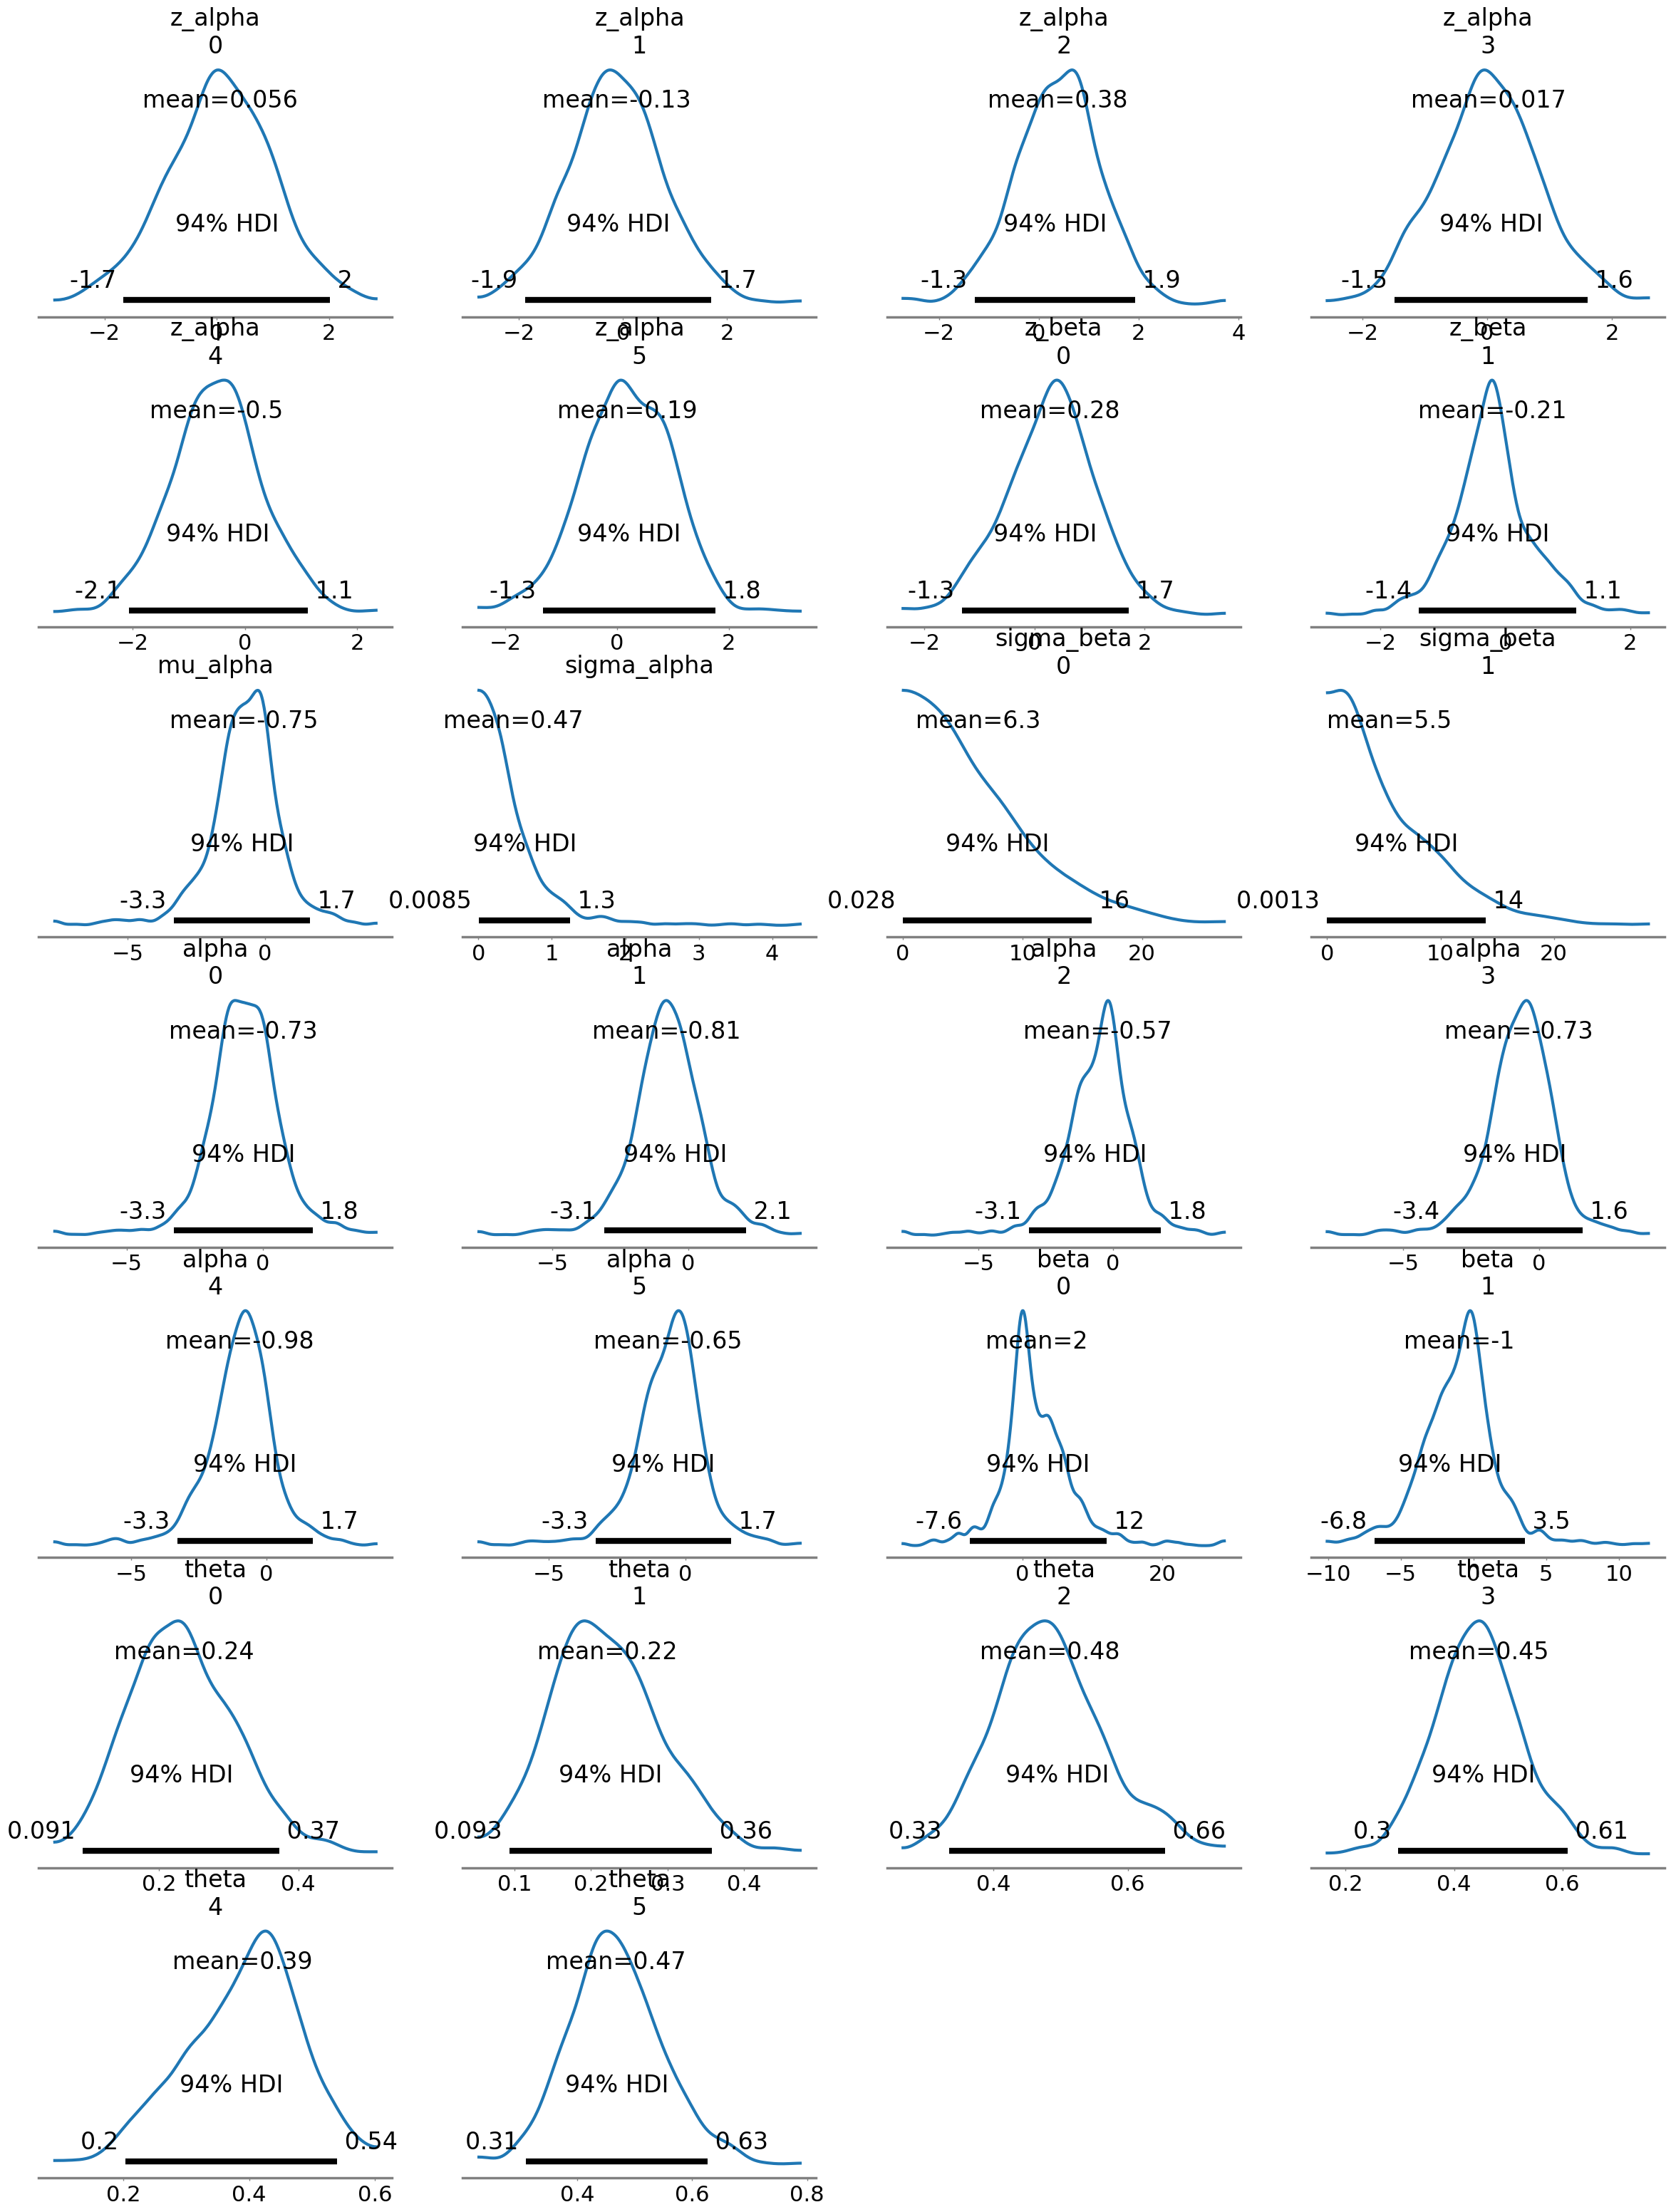

In [22]:
trial.plot_posterior(analysis_name, -1)

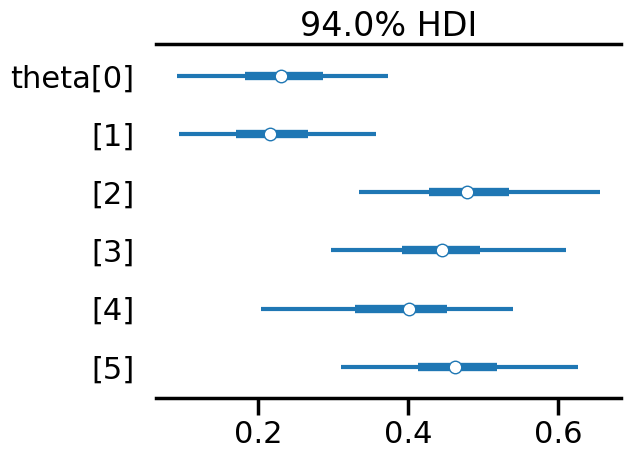

In [23]:
trial.plot_forest(analysis_name, -1)

In [24]:
trial.final_report(analysis_name)

,status,nnz,total
k,,,
0,COMPLETED_INEFFECTIVE,5,20
1,COMPLETED_INEFFECTIVE,4,20
2,COMPLETED_EFFECTIVE,11,20
3,COMPLETED_EFFECTIVE,9,20
4,COMPLETED_EFFECTIVE,6,20
5,COMPLETED_EFFECTIVE,10,20


## Model Comparison

In [25]:
trace_bhm = trial.iresults['bhm'][-1]
trace_logres = trial.iresults['logres'][-1]

In [26]:
trace_bhm

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [27]:
trace_logres

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data
	> constant_data

In [28]:
loo_bhm = az.loo(trace_bhm)
loo_bhm

/opt/anaconda3/envs/pyBasket/lib/python3.11/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 1000 posterior samples and 6 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -15.98     0.63
p_loo        3.60        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        1   16.7%
 (0.5, 0.7]   (ok)          2   33.3%
   (0.7, 1]   (bad)         1   16.7%
   (1, Inf)   (very bad)    2   33.3%

In [29]:
loo_logres = az.loo(trace_logres)
loo_logres

/opt/anaconda3/envs/pyBasket/lib/python3.11/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 1000 posterior samples and 6 observations log-likelihood matrix.

         Estimate       SE
elpd_loo   -13.92     0.52
p_loo        2.08        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        1   16.7%
 (0.5, 0.7]   (ok)          3   50.0%
   (0.7, 1]   (bad)         2   33.3%
   (1, Inf)   (very bad)    0    0.0%

In [30]:
df_comp_loo = az.compare({
    'bhm': trace_bhm,
    'logreg': trace_logres,
})
df_comp_loo

/opt/anaconda3/envs/pyBasket/lib/python3.11/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/opt/anaconda3/envs/pyBasket/lib/python3.11/site-packages/arviz/stats/stats.py:803: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
logreg,0,-13.923169,2.079471,0.000000,1.0,0.519426,0.000000,True,log
bhm,1,-15.979374,3.595182,2.056205,0.0,0.629265,0.862363,True,log


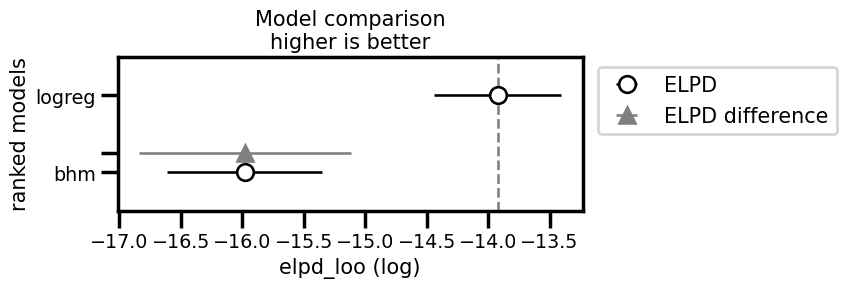

In [31]:
az.plot_compare(df_comp_loo);